** 회귀모형 6 **
- 카테고리 변수 encoding을 위한 fomula 활용, 회귀모형 1과 동일한 변수 조건
- 카테고리: Fuel_Type, Color 
- train 데이터 모두 사용

In [48]:
#회귀모형 2에서 제거한 변수들
['Color[T.Black]', 'Color[T.Blue]', 'Color[T.Green]', 'Color[T.Grey]',
       'Color[T.Red]', 'Color[T.Silver]', 'Color[T.Violet]', 'Color[T.White]',
       'Color[T.Yellow]', 'Met_Color', 'CC', 'Gears', 'ABS', 'Airbag_1',
       'Airbag_2', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Power_Steering', 'Radio', 'Mistlamps', 'Backseat_Divider',
       'Radio_cassette', 'Parking_Assistant']

#회귀모형 4에서 제거한 변수들
['Met_Color', 'Airco']

['Met_Color', 'Airco']

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

/Users/yoo/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from patsy import dmatrix

In [3]:
train_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/train.csv')
test_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/test.csv')

In [4]:
del train_df['Id']
#del train_df['Color']
del train_df['Model']
# del train_df['Fuel_Type']
del train_df['Fuel_Type.1']
del train_df['Cylinders']

In [5]:
y_train_df = train_df['Price']

In [6]:
del train_df['Price']

In [7]:
x_train_df = train_df

In [8]:
# 엑셀 단에서 인코딩된 dummy 변수 제외
del x_train_df['col_dummy1']
del x_train_df['col_dummy2']
del x_train_df['col_dummy3']
del x_train_df['col_dummy4']
del x_train_df['col_dummy5']
del x_train_df['col_dummy6']
del x_train_df['col_dummy7']
del x_train_df['col_dummy8']
del x_train_df['col_dummy9']
del x_train_df['col_dummy10']
del x_train_df['fuel_dumm1']
del x_train_df['fuel_dumm2']
del x_train_df['fuel_dumm3']


In [9]:
x_train_df.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Color
0,23,10,2002,46986,Diesel,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,Blue
1,23,10,2002,72937,Diesel,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,Silver
2,30,3,2002,38500,Diesel,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,0,Black
3,25,8,2002,31461,Petrol,192,0,0,1800,3,...,1,0,0,0,0,1,0,0,0,Silver
4,25,8,2002,32189,Petrol,192,0,0,1800,3,...,1,0,1,1,1,1,0,0,0,Red


In [10]:
for i in x_train_df.columns:
    print(i + ' +', end=' ')

Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Met_Color + Automatic + CC + Doors + Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Central_Lock + Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette + Parking_Assistant + Tow_Bar + Color + 

In [11]:
fomula = "y_train_df ~ Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Met_Color + Automatic + CC + Doors + Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Central_Lock + Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette + Parking_Assistant + Tow_Bar + Color"

In [12]:
model_2 = sm.OLS.from_formula(fomula, data=x_train_df)

In [13]:
result_model_2 = model_2.fit()
print(result_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             y_train_df   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:01:15   Log-Likelihood:                -8567.8
No. Observations:                1019   AIC:                         1.722e+04
Df Residuals:                     975   BIC:                         1.744e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0081    

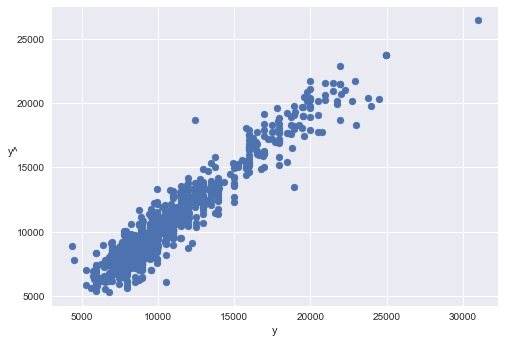

In [14]:
y_train_new = result_model_2.predict(x_train_df)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()

In [15]:
sm.tools.eval_measures.rmse(y_train_df, y_train_new)

1084.7718181200207

** 회귀모형 4 생성 **


In [16]:
# pvalue > 0.05 이상 확인
to_del_var = result_model_2.pvalues[result_model_2.pvalues > 0.05]

In [17]:
to_del_var.index

Index(['Color[T.Black]', 'Color[T.Blue]', 'Color[T.Green]', 'Color[T.Grey]',
       'Color[T.Red]', 'Color[T.Silver]', 'Color[T.Violet]', 'Color[T.White]',
       'Color[T.Yellow]', 'Met_Color', 'CC', 'Gears', 'ABS', 'Airbag_1',
       'Airbag_2', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Power_Steering', 'Radio', 'Mistlamps', 'Backseat_Divider',
       'Radio_cassette', 'Parking_Assistant'],
      dtype='object')

In [18]:
x_train_df_4 = x_train_df

In [19]:
del x_train_df_4['Color']

In [21]:
for i in to_del_var.index:
    if 'Color' not in i:
        del x_train_df_4[i]

KeyError: 'CC'

In [22]:
x_train_df_4.columns

Index(['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Automatic', 'Doors', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'Airco',
       'Automatic_airco', 'Powered_Windows', 'Sport_Model', 'Metallic_Rim',
       'Tow_Bar'],
      dtype='object')

In [23]:
for i in x_train_df.columns:
    print(i + ' +', end=' ')

Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Met_Color + Automatic + Doors + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + Airco + Automatic_airco + Powered_Windows + Sport_Model + Metallic_Rim + Tow_Bar + 

In [24]:
fomula = "y_train_df ~ Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Met_Color + Automatic + Doors + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + Airco + Automatic_airco + Powered_Windows + Sport_Model + Metallic_Rim + Tow_Bar"
model_4 = sm.OLS.from_formula(fomula, data=x_train_df)
result_model_4 = model_4.fit()
print(result_model_4.summary())


                            OLS Regression Results                            
Dep. Variable:             y_train_df   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     474.2
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:01:51   Log-Likelihood:                -8595.8
No. Observations:                1019   AIC:                         1.723e+04
Df Residuals:                     998   BIC:                         1.734e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0082    

In [25]:
x_train_df_4.columns

Index(['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Automatic', 'Doors', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'Airco',
       'Automatic_airco', 'Powered_Windows', 'Sport_Model', 'Metallic_Rim',
       'Tow_Bar'],
      dtype='object')

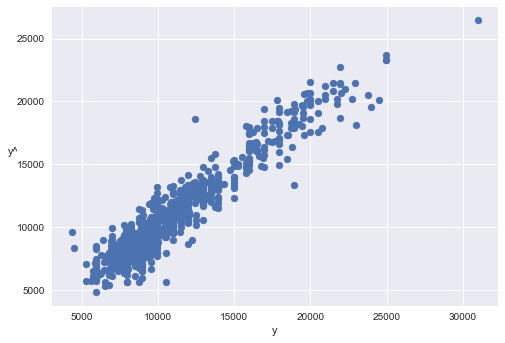

1114.95120658


In [26]:
y_train_new = result_model_4.predict(x_train_df_4)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()
print(sm.tools.eval_measures.rmse(y_train_df, y_train_new))

** 회귀모형 6 생성 및 확인 **

In [31]:
# 회귀모형 4에서 제외해야할 변수 확인

to_del_var = result_model_4.pvalues[result_model_4.pvalues > 0.05].index
to_del_var

Index(['Met_Color', 'Airco'], dtype='object')

In [35]:
for i in to_del_var:
    del x_train_df_4[i]

In [37]:
for i in x_train_df_4.columns:
    print(i + ' +', end=' ')

Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Automatic + Doors + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + Automatic_airco + Powered_Windows + Sport_Model + Metallic_Rim + Tow_Bar + 

In [40]:
fomula = "y_train_df ~ Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Automatic + Doors + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + Automatic_airco + Powered_Windows + Sport_Model + Metallic_Rim + Tow_Bar"
model_6 = sm.OLS.from_formula(fomula, data=x_train_df_4)
result_model_6 = model_6.fit()
print(result_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:             y_train_df   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     525.8
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:08:45   Log-Likelihood:                -8597.6
No. Observations:                1019   AIC:                         1.723e+04
Df Residuals:                    1000   BIC:                         1.733e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0082    

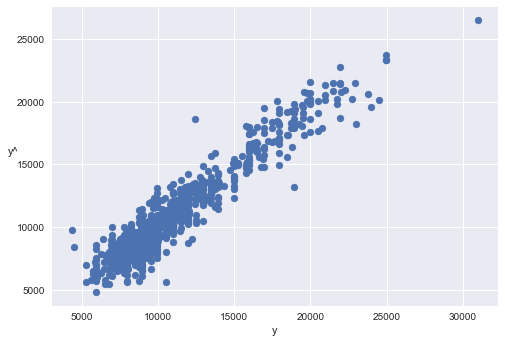

1116.9740107


In [42]:
y_train_new = result_model_6.predict(x_train_df_4)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()
print(sm.tools.eval_measures.rmse(y_train_df, y_train_new))